## This notebook assumes you have the following packages installed in your conda environment.

In [1]:
import pandas as pd
import json
import community
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np
import randomcolor

In [58]:
df = pd.read_csv('graph_scc_data/signdata_latest.csv')
df.shape


(2768, 153)

In [38]:
df_new = df[['EntryID', 'Code']]
df_new.head()

,EntryID,Code
0,&=arms-cross,J_01_098
1,&=clap,J_02_076
2,&=raise-hand,H_02_48
3,&=sigh,H_03_86
4,1_dollar,C_02_025


In [39]:
df.head()

,EntryID,LemmaID,Code,YouTube Video,Vimeo Video,SignFrequency(M),SignFrequency(SD),SignFrequency(Z),SignFrequency(N),PercentUnknown,...,MovementM6.2.0,MajorLocationM6.2.0,MinorLocationM6.2.0,SecondMinorLocationM6.2.0,ContactM6.2.0,NonDominantHandshapeM6.2.0,UlnarRotationM6.2.0,Batch,Item,List
0,&=arms-cross,NaN,J_01_098,"<iframe width=""280"" height=""158"" src=""https://...",NaN,3.467,NaN,-0.458,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J,98.0,1.0
1,&=clap,NaN,J_02_076,"<iframe width=""280"" height=""158"" src=""https://...",NaN,3.867,NaN,-0.127,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J,76.0,2.0
2,&=raise-hand,NaN,H_02_48,"<iframe width=""280"" height=""158"" src=""https://...",NaN,2.280,NaN,-1.163,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,48.0,2.0
3,&=sigh,NaN,H_03_86,"<iframe width=""280"" height=""158"" src=""https://...",NaN,5.154,NaN,0.544,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,86.0,3.0
4,1_dollar,1_dollar,C_02_025,"<iframe width=""280"" height=""158"" src=""https://...",NaN,3.034,1.5,-0.775,29.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,25.0,2.0


In [46]:
nodes_series = df.apply(lambda x: x.dropna().to_dict(), 1).groupby(df.index // 2).apply(lambda x: x.to_dict())
nodes_array = [i for i in nodes_series]


In [55]:
graph ={'nodes': nodes_array, 'links': []}

In [57]:
import json
with open("test.json", 'w') as file:
    json.dump(graph, file)

## Community Analysis

In [51]:
nodes_array

[{'EntryID': '&=arms-cross',
  'Code': 'J_01_098',
  'YouTube Video': '<iframe width="280" height="158" src="https://www.youtube.com/embed/ZqtSZRrXLo4?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>',
  'SignFrequency(M)': 3.467,
  'SignFrequency(Z)': -0.45799999999999996,
  'Iconicity(M)': 6.52,
  'Iconicity(SD)': 0.963,
  'Iconicity(Z)': 1.619,
  'Iconicity(N)': 25.0,
  'Iconicity_ID': 'crossing arms',
  'Complexity': 4.0,
  'RightWristX': 973.0,
  'RightWristcentroidY': 1056.0,
  'DistanceRightWristCentroid2Nose': 1436.0,
  'IconicityType': 'Pantomimic',
  'Batch': 'J',
  'Item': 98.0,
  'List': 1.0},
 {'EntryID': '&=clap',
  'Code': 'J_02_076',
  'YouTube Video': '<iframe width="280" height="158" src="https://www.youtube.com/embed/fTW7F6oZFjE?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>',
  'SignFrequency(M)': 3.867,
  'SignFrequency(Z)': -0.127,
  'Iconicity(M)': 6.667000000000001,
  'Iconicity(SD)': 1.00700000000000

In [16]:
edges_df = pd.read_csv('graph_scc_data/default-neighbors.csv')
edges_df = edges_df.rename(columns={"neighbor": "source"})
edges_df.head()


,target,source,num_matched_features,matched_features,num_missed_features,missed_features
0,A_01_002,B_01_062,13,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",0,NaN
1,A_01_002,B_03_025,12,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",1,SignType.2.0
2,A_01_002,C_03_023,12,"SelectedFingers.2.0, FlexionChange.2.0, Spread...",1,Flexion.2.0
3,A_01_002,F_02_88,12,"Flexion.2.0, FlexionChange.2.0, Spread.2.0, Sp...",1,SelectedFingers.2.0
4,A_01_002,H_03_4,12,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",1,ThumbPosition.2.0


In [17]:
len(edges_df['target'].unique())

1771

In [18]:
edges_df.shape

(14826, 6)

/Users/shreya/anaconda3/envs/asl/lib/python3.7/site-packages/networkx-2.3-py3.7.egg/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


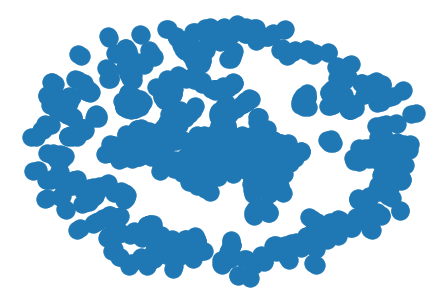

In [19]:
g = nx.from_pandas_edgelist(edges_df, source='source', target='target') 
nx.draw(g)

In [20]:
#first compute the best partition
from networkx.algorithms.community import greedy_modularity_communities
G = g

#Two methods for community analysis
c = list(greedy_modularity_communities(G))
partition = community.best_partition(G)

In [27]:
num_nodes = 0
for community in c:
    num_nodes += len(community)
print(num_nodes)

1771


In [22]:
len(partition)

1771

In [23]:
#Noes only connected by edges. Does not include standalone nodes.

list = partition.items()
print(len(list))
df_with_groupids = pd.DataFrame(list, columns=['Code', 'group_id'])
df_with_groupids.head()

1771


,Code,group_id
0,B_01_062,0
1,A_01_002,0
2,B_03_025,0
3,C_03_023,0
4,F_02_88,0


In [24]:
edges_df.head()


,target,source,num_matched_features,matched_features,num_missed_features,missed_features
0,A_01_002,B_01_062,13,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",0,NaN
1,A_01_002,B_03_025,12,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",1,SignType.2.0
2,A_01_002,C_03_023,12,"SelectedFingers.2.0, FlexionChange.2.0, Spread...",1,Flexion.2.0
3,A_01_002,F_02_88,12,"Flexion.2.0, FlexionChange.2.0, Spread.2.0, Sp...",1,SelectedFingers.2.0
4,A_01_002,H_03_4,12,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",1,ThumbPosition.2.0


In [25]:
# get edges only where source and target nodes belong to a valid community for now
nodes_in_communities = df_with_groupids['Code'].unique()
edges_for_community_nodes_df = edges_df.loc[edges_df['source'].isin(nodes_in_communities) & edges_df['target'].isin(nodes_in_communities)]
print(len(edges_for_community_nodes_df['source'].unique()))
print(edges_df.shape)
print(edges_for_community_nodes_df.shape)
edges_for_community_nodes_df.head()

1771
(14826, 6)
(14826, 6)


,target,source,num_matched_features,matched_features,num_missed_features,missed_features
0,A_01_002,B_01_062,13,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",0,NaN
1,A_01_002,B_03_025,12,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",1,SignType.2.0
2,A_01_002,C_03_023,12,"SelectedFingers.2.0, FlexionChange.2.0, Spread...",1,Flexion.2.0
3,A_01_002,F_02_88,12,"Flexion.2.0, FlexionChange.2.0, Spread.2.0, Sp...",1,SelectedFingers.2.0
4,A_01_002,H_03_4,12,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",1,ThumbPosition.2.0


In [26]:
df_merged = pd.merge(df_new, df_with_groupids,how='left', on=['Code'])
df_merged.head(20)

,EntryID,Code,group_id
0,&=arms-cross,J_01_098,NaN
1,&=clap,J_02_076,NaN
2,&=raise-hand,H_02_48,NaN
3,&=sigh,H_03_86,NaN
4,1_dollar,C_02_025,NaN
5,5_dollars,B_01_062,0.0
6,8_hour,C_02_055,NaN
7,9_oclock,C_02_080,92.0
8,A-LINE_BOB,K_03_127,NaN
9,a_little_bit,H_03_25,9.0


In [27]:
#Will assign all NaN's same color for now. That's okay.

df_merged.head()
unique_community_ids = df_merged['group_id'].unique()
color_dict = []
for groupid in unique_community_ids:
    #generate a random color
    color = randomcolor.RandomColor().generate()[0]
    color_dict.append({'group_id': groupid, 'color_code': color})
    
color_dict

[{'group_id': nan, 'color_code': '#1eb2ad'},
 {'group_id': 0.0, 'color_code': '#fff587'},
 {'group_id': 92.0, 'color_code': '#f961a3'},
 {'group_id': 9.0, 'color_code': '#cce07b'},
 {'group_id': 90.0, 'color_code': '#d657bc'},
 {'group_id': 165.0, 'color_code': '#f7cd96'},
 {'group_id': 147.0, 'color_code': '#3835fc'},
 {'group_id': 34.0, 'color_code': '#1049ce'},
 {'group_id': 123.0, 'color_code': '#5ecedb'},
 {'group_id': 27.0, 'color_code': '#9d7fd1'},
 {'group_id': 62.0, 'color_code': '#4ed36d'},
 {'group_id': 20.0, 'color_code': '#25e866'},
 {'group_id': 47.0, 'color_code': '#012b5b'},
 {'group_id': 12.0, 'color_code': '#5a81ce'},
 {'group_id': 11.0, 'color_code': '#75e594'},
 {'group_id': 63.0, 'color_code': '#ade861'},
 {'group_id': 31.0, 'color_code': '#edaaa1'},
 {'group_id': 71.0, 'color_code': '#7ba3ed'},
 {'group_id': 1.0, 'color_code': '#9fa9f4'},
 {'group_id': 89.0, 'color_code': '#22e84a'},
 {'group_id': 4.0, 'color_code': '#f9c2c6'},
 {'group_id': 8.0, 'color_code': '#a

In [28]:
color_df = pd.DataFrame(color_dict)
df_merged_with_color = pd.merge(df_merged, color_df,how='left', on=['group_id'])
print(df_merged_with_color.shape)
df_merged_with_color.head(20)


(2768, 4)


,EntryID,Code,group_id,color_code
0,&=arms-cross,J_01_098,NaN,#1eb2ad
1,&=clap,J_02_076,NaN,#1eb2ad
2,&=raise-hand,H_02_48,NaN,#1eb2ad
3,&=sigh,H_03_86,NaN,#1eb2ad
4,1_dollar,C_02_025,NaN,#1eb2ad
5,5_dollars,B_01_062,0.0,#fff587
6,8_hour,C_02_055,NaN,#1eb2ad
7,9_oclock,C_02_080,92.0,#f961a3
8,A-LINE_BOB,K_03_127,NaN,#1eb2ad
9,a_little_bit,H_03_25,9.0,#cce07b


In [29]:
df_merged_with_color.shape

(2768, 4)

In [32]:
edges_df.to_csv('graph_scc_data/edges_all.csv')


In [33]:
df_merged_with_color.to_csv('graph_scc_data/nodes_all.csv')

In [163]:
df_merged_with_color['num_edges'] = df.apply(lambda row: len(g_7000.edges(row['Code'])), axis=1)
df_merged_with_color.head(10)


,EntryID,Code,group_id,color_code,num_edges
0,5_dollars,B_01_062,0,#ad66cc,0
1,afternoon,J_01_040,0,#ad66cc,0
2,all_of_sudden,H_01_96,0,#ad66cc,0
3,basketball,A_03_045,0,#ad66cc,0
4,baster_1,G_03_53,0,#ad66cc,0
5,beg,F_02_37,0,#ad66cc,6
6,blue,C_02_062,0,#ad66cc,0
7,bottom_2,F_01_66,0,#ad66cc,2
8,butterfly,A_03_056,0,#ad66cc,0
9,bye,E_01_58,0,#ad66cc,2


In [164]:
df_merged_with_color['num_edges'].value_counts()

0     744
1     259
2     159
3      98
4      79
5      71
6      58
7      46
8      31
10     25
11     23
9      19
20     18
19     17
21     13
13     12
14     11
12     10
48     10
22      9
27      9
17      7
24      7
45      6
15      5
29      5
16      5
18      4
23      3
47      2
26      2
28      2
31      1
46      1
Name: num_edges, dtype: int64

In [165]:
df_merged_with_color.to_csv('nodes_with_colors.csv')

/Users/shreya/anaconda3/envs/asl/lib/python3.7/site-packages/networkx-2.3-py3.7.egg/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


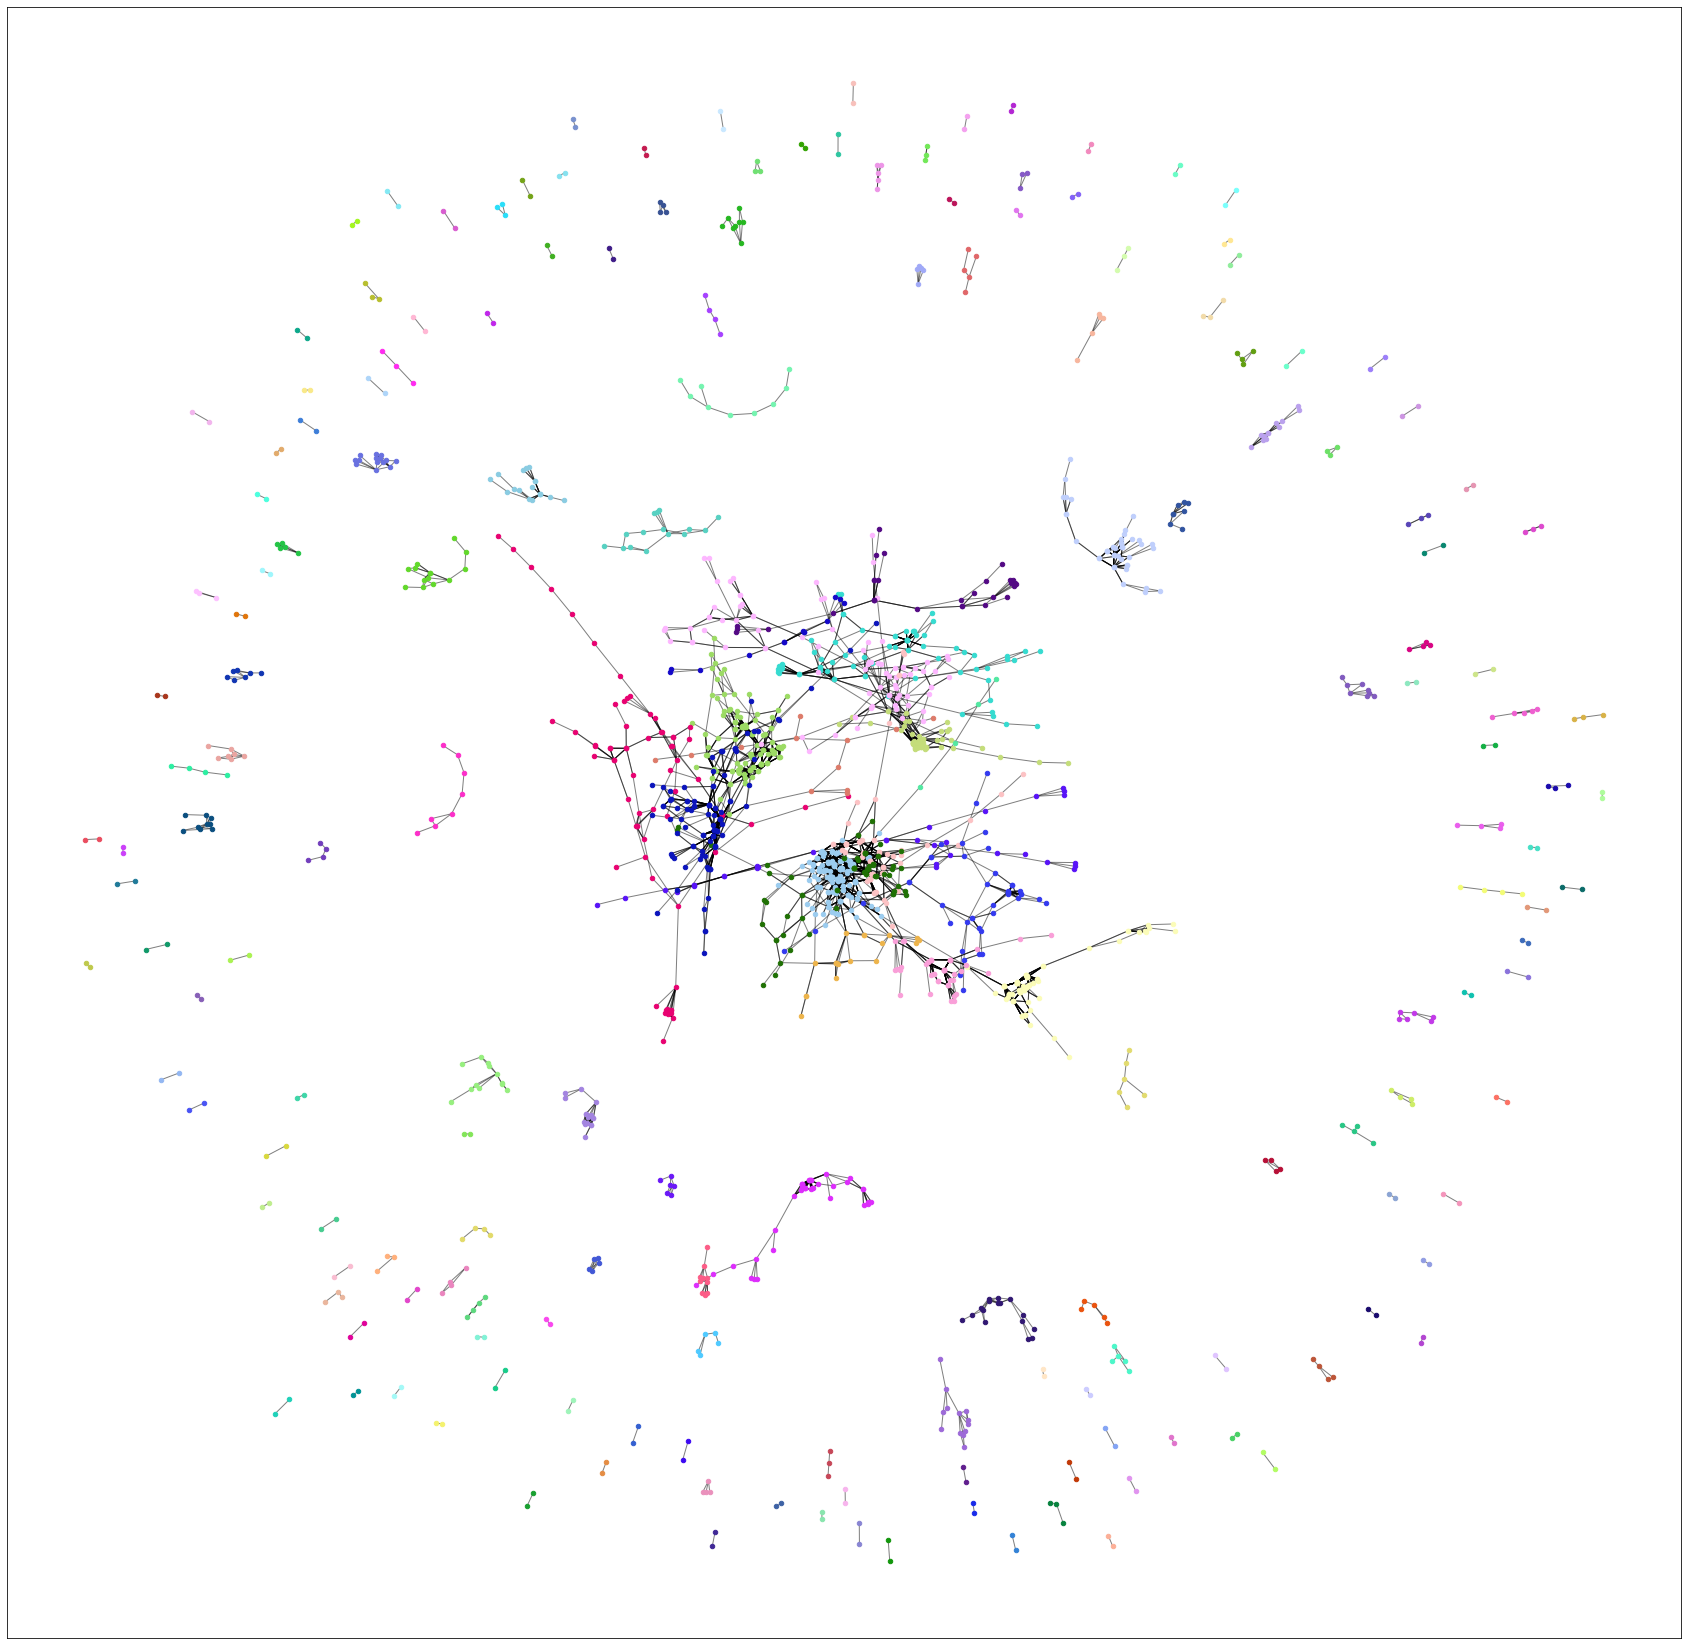

In [35]:
#drawing only nodes with edges
fig = plt.figure()
fig.set_figheight(30)
fig.set_figwidth(30)
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = randomcolor.RandomColor().generate()[0])


nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()